In [1]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 640.0 kB/s eta 0:00:20
     --------------------------------------- 0.1/12.8 MB 812.7 kB/s eta 0:00:16
     - -------------------------------------- 0.5/12.8 MB 3.5 MB/s eta 0:00:04
     ----- ---------------------------------- 1.7/12.8 MB 9.6 MB/s eta 0:00:02
     -------- ------------------------------- 2.6/12.8 MB 12.5 MB/s eta 0:00:01
     ------------ --------------------------- 4.2/12.8 MB 15.6 MB/s eta 0:00:01
     ----------------- ---------------------- 5.6/12.8 MB 17.9 MB/s eta 0:00:01
     ---------------------- ----------------- 7.3/12.8 MB 20.3 MB/s eta 0:00:01
     --------------------------- ------------ 8.8/12.8 MB 21.6 MB/s eta 0:00:01
     ------------------------------- ------- 10.3/12.8 MB 22.5 MB/s eta 0:00:01
     ---------------------------------- ---- 11.4/12.8 MB 29.8 MB/s eta 0:00:01
     ------------------------------------ -- 11.9/

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv',header=None,index_col=0)
df

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...
4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...


In [4]:
df.head()

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
df=df[[2,3]].reset_index(drop=True)
df

,2,3
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
75677,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,Positive,Today sucked so it’s time to drink wine n play...
75680,Positive,Bought a fraction of Microsoft today. Small wins.


In [6]:
df.columns=['sentiment','text']
df.head(3)

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [8]:
 df.isnull().sum()
df.dropna(inplace=True)


In [9]:
sum(df['text'].apply(len)>5),sum(df['text'].apply(len)<=5)

(72883, 2113)

In [42]:
df.isnull().sum()
df.dropna(inplace=True)
sum(df['text'].apply(len)>5),sum(df['text'].apply(len)<=5)
print(df.shape)
df=df[df['text'].apply(len)>5]
print(df.shape)

(72883, 10)
(72571, 10)


In [11]:
df['sentiment'].value_counts()

sentiment
Negative      22020
Positive      20186
Neutral       17899
Irrelevant    12778
Name: count, dtype: int64

In [12]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall



  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\nalla\appdata\local\temp\pip-req-build-ht5dbvxs
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7667 sha256=8bfecc509bc2dcf041b8ed293e50eddad64dba9b2037ee50aff1d5ec92692cd3
  Stored in directory: C:\Users\nalla\AppData\Local\Temp\pip-ephem-wheel-cache-5uwtenj3\wheels\74\fe\05\0d013c54ae5e4afb77c6c480378063827c84f57ea5f554e072
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\nalla\AppData\Local\Temp\pip-req-build-ht5dbvxs'


In [13]:
import preprocess_kgptalkie as ps
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [14]:
df=ps.get_basic_features(df)

In [15]:
df=ps.get_basic_features(df)
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

In [16]:
df.head()

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,43,11,3.909091,6,0,0,1,0
1,Positive,I am coming to the borders and I will kill you...,40,12,3.333333,6,0,0,1,2
2,Positive,im getting on borderlands and i will kill you ...,41,10,4.100000,5,0,0,1,0
3,Positive,im coming on borderlands and i will murder you...,42,10,4.200000,5,0,0,1,0
4,Positive,im getting on borderlands 2 and i will murder ...,46,12,3.833333,6,0,0,2,0


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


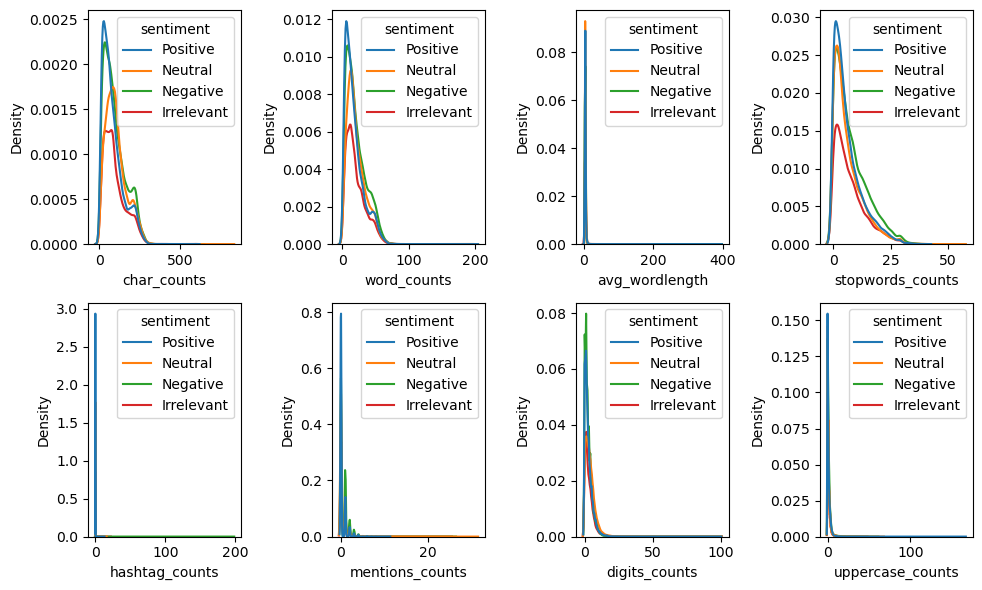

In [18]:
plt.figure(figsize=(10,6))
num_cols=df.select_dtypes(include='number').columns
for index,col in enumerate(num_cols):
    plt.subplot(2,4,index+1)
    sns.kdeplot(data=df,x=col,hue='sentiment',fill=False)
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

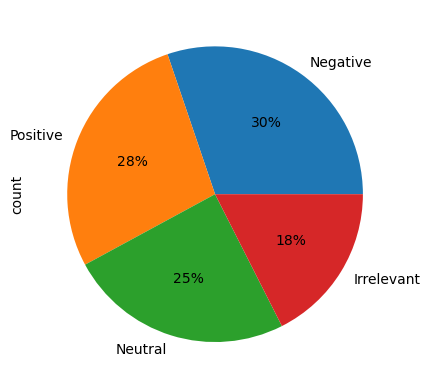

In [19]:
df['sentiment'].value_counts().plot(kind='pie',autopct="%1.0f%%")

In [20]:
!pip install wordcloud

In [21]:
from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS)


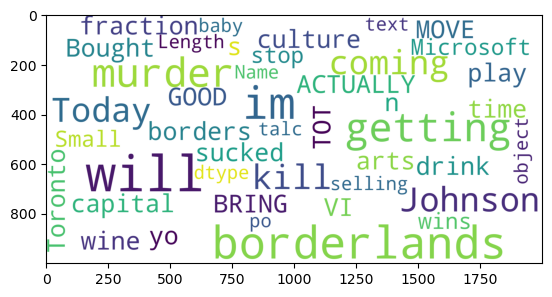

In [22]:
from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS)
wordcloud=WordCloud(background_color='white',stopwords=stopwords,max_words=300,max_font_size=40,scale=5).generate(str(df['text']))
plt.imshow(wordcloud)

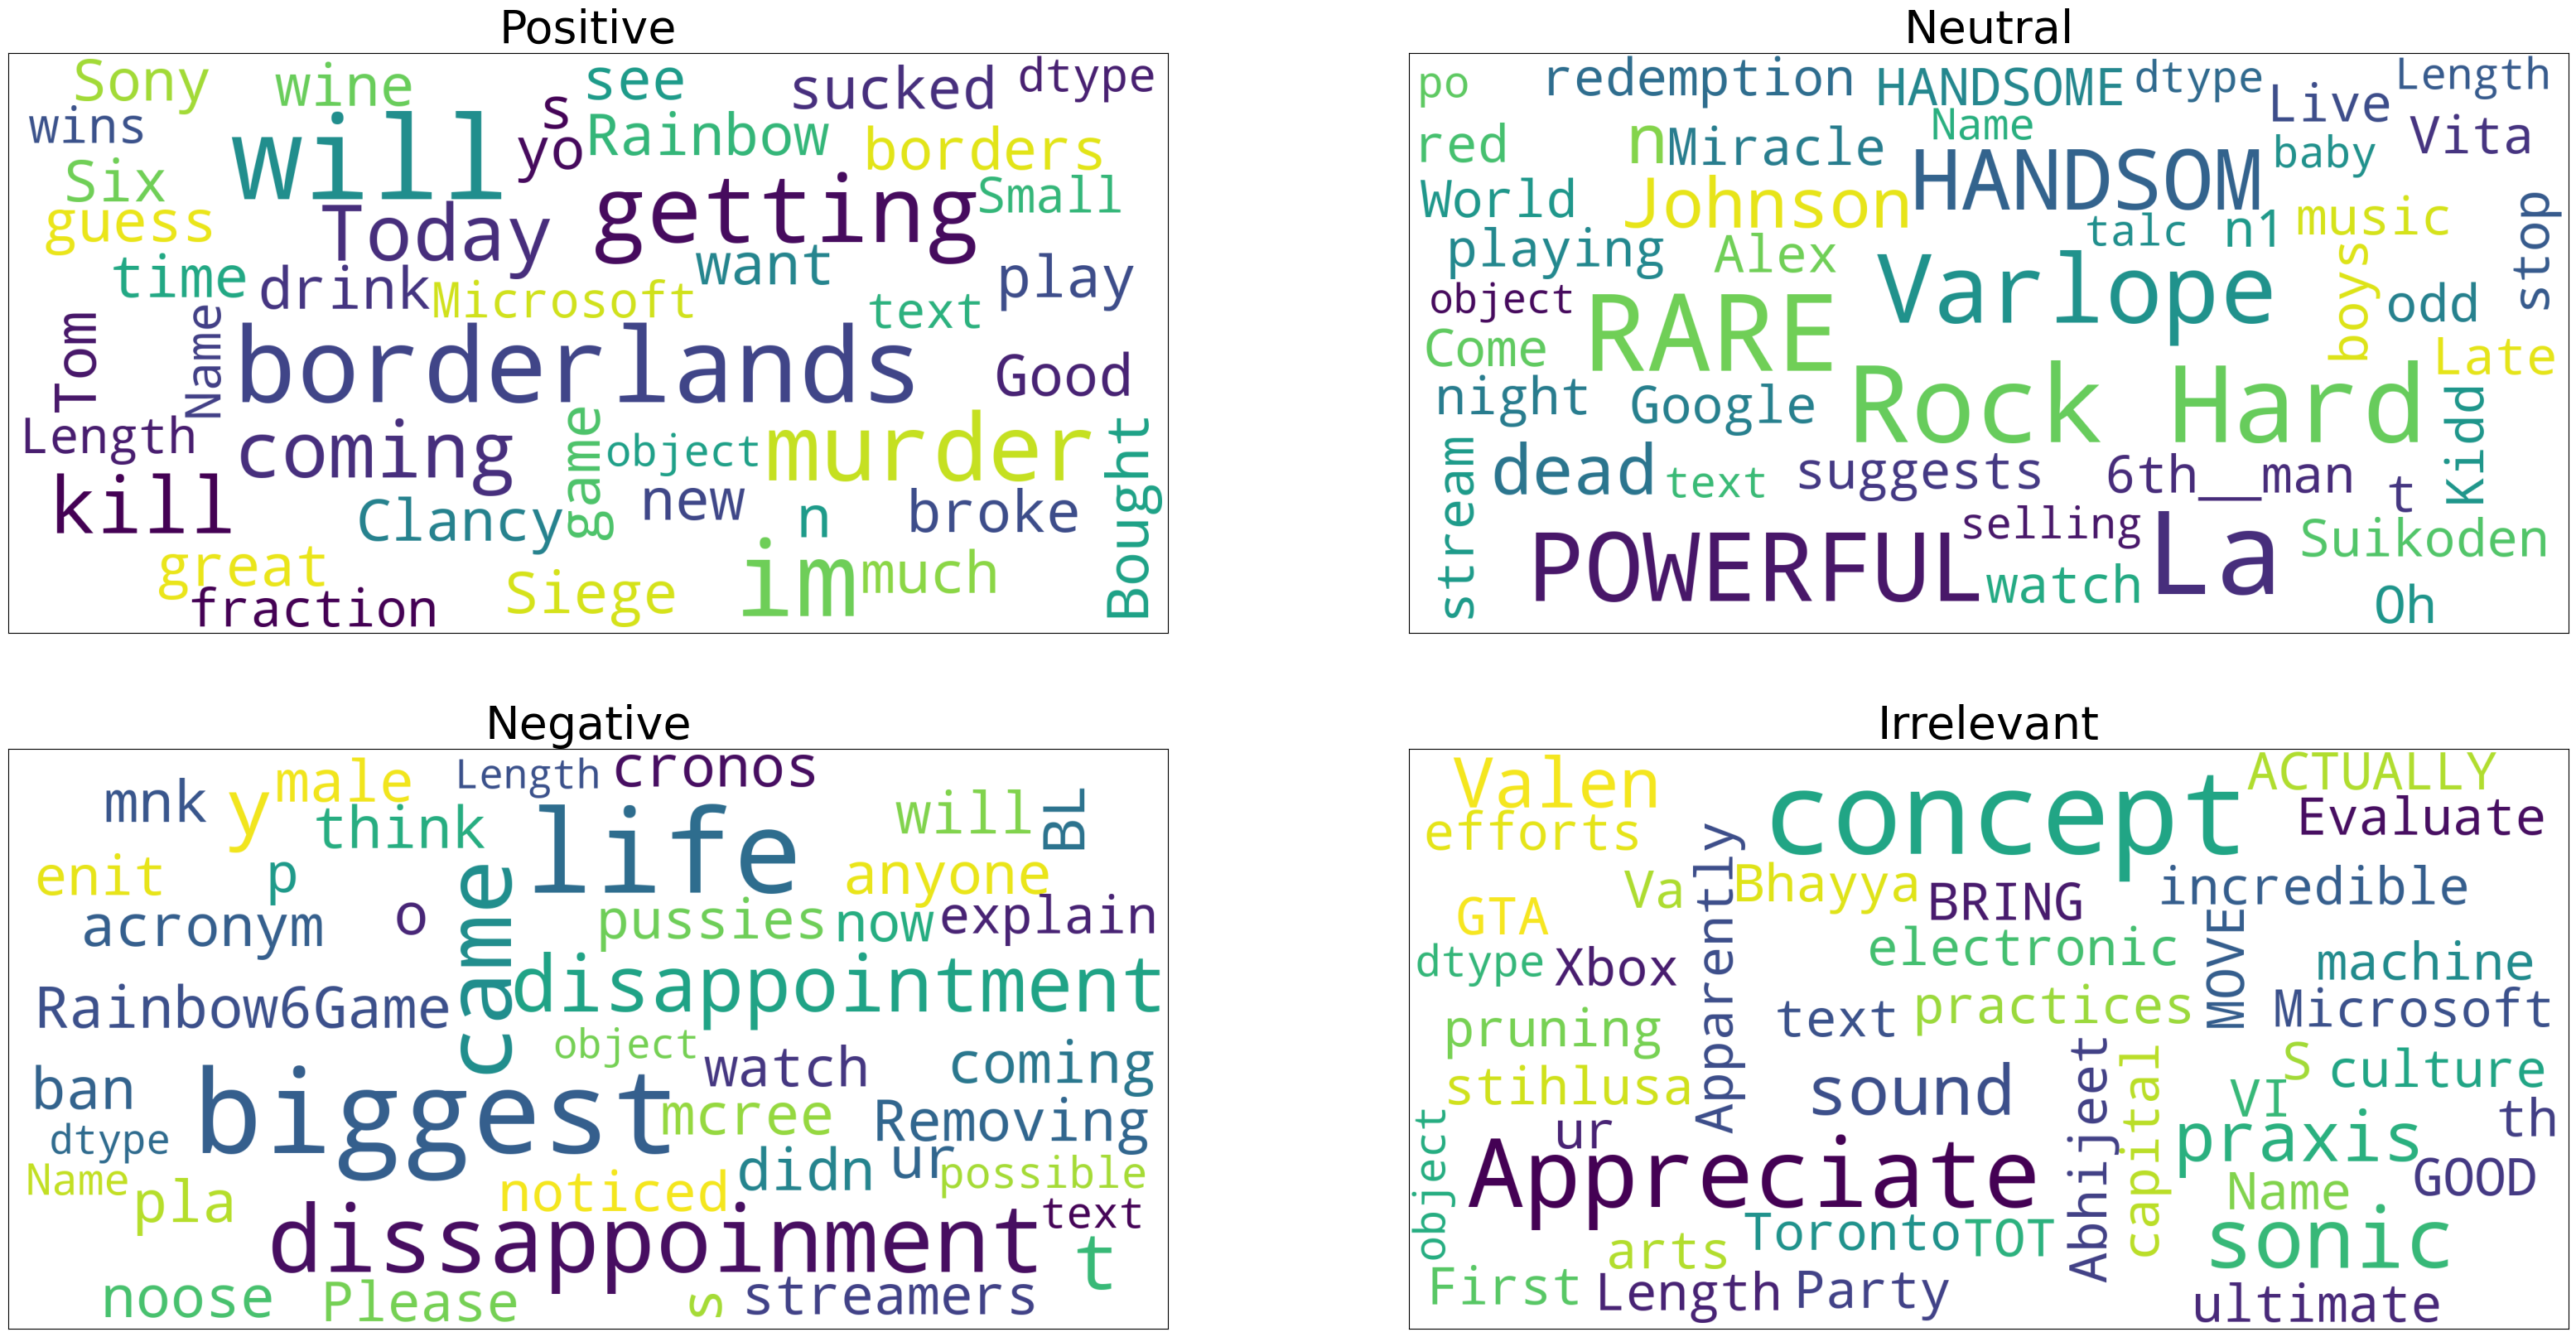

In [23]:
plt.figure(figsize=(40,20))
for index,sent in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2,index+1)
    data=df[df['sentiment']==sent]['text']
    wordcloud=WordCloud(background_color='white',stopwords=stopwords,max_words=300,max_font_size=40,scale=5).generate(str(data))
    plt.imshow(wordcloud)
    plt.xticks([])
    plt.yticks([])
    plt.title(sent,fontsize=40)

In [24]:
#Data Cleaning


In [25]:
df['text']=df['text'].apply(lambda x:x.lower())
df['text']=df['text'].apply(lambda x:ps.remove_urls(x))
df['text']=df['text'].apply(lambda x:ps.remove_html_tags(x))
df['text']=df['text'].apply(lambda x:ps.remove_rt(x))
df['text']=df['text'].apply(lambda x:ps.remove_special_chars(x))

In [26]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['text'],df['sentiment'],test_size=0.2,random_state=0)

In [28]:
X_train.shape,X_test.shape

((58306,), (14577,))

In [29]:
###Model Building and Testing

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

clf=Pipeline([('tfid',TfidfVectorizer()),('rfc',RandomForestClassifier(n_jobs=-1))])
clf.fit(X_train,y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [31]:
###Evaluation

In [32]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(accuracy)
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.98      0.85      0.91      2561
    Negative       0.91      0.95      0.93      4481
     Neutral       0.93      0.91      0.92      3553
    Positive       0.91      0.95      0.93      3982

    accuracy                           0.92     14577
   macro avg       0.93      0.92      0.92     14577
weighted avg       0.93      0.92      0.92     14577

0.9244014543458874
[[2185  131   90  155]
 [  21 4274   87   99]
 [  14  156 3249  134]
 [  19  112   84 3767]]


In [33]:
import pickle 
pickle.dump(clf,open('twitter_sentiment.pkl','wb'))
with open('model_accuracy.pkl', 'wb') as f:
    pickle.dump(accuracy, f)


In [38]:
clf.predict(['How the hell are we into Halloween month already?!'])

array(['Irrelevant'], dtype=object)

In [39]:
clf.predict(['I am glad to see you'])

array(['Positive'], dtype=object)

In [40]:
clf.predict(['Check out this epic streamer!'])

array(['Neutral'], dtype=object)

In [41]:
clf.predict(['The biggest disappointment of my life came a year ago'])

array(['Negative'], dtype=object)